In [1]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
from matplotlib.offsetbox import AnchoredText
#import matplotlib
#matplotlib.use("agg")

import xarray as xr
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
import os

In [2]:
import tensorflow as tf

In [3]:
from glob import glob

In [4]:
nc_files=glob("//smb.uni-oldenburg.de/hpc_data/NEWA_nc/*.nc")
nc_files

['//smb.uni-oldenburg.de/hpc_data/NEWA_nc\\P-CE-2017-2017-01-07.nc',
 '//smb.uni-oldenburg.de/hpc_data/NEWA_nc\\P-CE-2018-2018-03-01.nc',
 '//smb.uni-oldenburg.de/hpc_data/NEWA_nc\\P-CE-2018-2018-06-01.nc',
 '//smb.uni-oldenburg.de/hpc_data/NEWA_nc\\P-CE-2018-2018-09-01.nc',
 '//smb.uni-oldenburg.de/hpc_data/NEWA_nc\\P-CE-2018-2018-12-17.nc',
 '//smb.uni-oldenburg.de/hpc_data/NEWA_nc\\P-GB-2018-2018-12-17.nc']

In [5]:
geogrid_diri=glob("//smb.uni-oldenburg.de/hpc_data/NEWA_nc/geogrid/*")
geogrid_diri

['//smb.uni-oldenburg.de/hpc_data/NEWA_nc/geogrid\\CE',
 '//smb.uni-oldenburg.de/hpc_data/NEWA_nc/geogrid\\GB']

In [6]:
ds_CE=xr.open_dataset(nc_files[0])
LR_WRF=ds_CE.isel(south_north=slice(2,412),time=0)

In [14]:
ds_CE

<xarray.Dataset>
Dimensions:      (height: 7, south_north: 414, time: 48, west_east: 540)
Coordinates:
  * time         (time) datetime64[ns] 2017-01-07 ... 2017-01-07T23:35:29
  * height       (height) float32 50.0 75.0 100.0 150.0 200.0 250.0 500.0
  * south_north  (south_north) float32 -938998.4 -935998.4 ... 297001.6 300001.6
  * west_east    (west_east) float32 -912000.25 -909000.25 ... 704999.75
    XLAT         (south_north, west_east) float32 44.647305 ... 56.28197
    XLON         (south_north, west_east) float32 ...
Data variables:
    crs          |S1 ...
    Times        (time) |S19 ...
    ABLAT_CYL    (time, height, south_north, west_east) float32 ...
    ACCRE_CYL    (time, height, south_north, west_east) float32 ...
    ALPHA        (south_north, west_east) float32 ...
    HFX          (time, south_north, west_east) float32 ...
    HGT          (south_north, west_east) float32 ...
    LANDMASK     (south_north, west_east) float32 ...
    LH           (time, south_north, west_east) float32 ...
    LU_INDEX     (south_north, west_east) float32 ...
    PBLH         (time, south_north, west_east) float32 ...
    WS           (time, height, south_north, west_east) float32 ...
    WD           (time, height, south_north, west_east) float32 ...
    PD           (time, height, south_north, west_east) float32 ...
    PRECIP       (time, south_north, west_east) float32 ...
    PSFC         (time, south_north, west_east) float32 ...
    Q2           (time, south_north, west_east) float32 ...
    QVAPOR       (time, height, south_north, west_east) float32 ...
    RHO          (time, south_north, west_east) float32 ...
    RMOL         (time, south_north, west_east) float32 ...
    SEAICE       (time, south_north, west_east) float32 ...
    SWDDIR       (time, south_north, west_east) float32 ...
    SWDDNI       (time, south_north, west_east) float32 ...
    T            (time, height, south_north, west_east) float32 ...
    T2           (time, south_north, west_east) float32 ...
    TKE          (time, height, south_north, west_east) float32 ...
    TSK          (time, south_north, west_east) float32 ...
    UST          (time, south_north, west_east) float32 ...
    WD10         (time, south_north, west_east) float32 ...
    WS10         (time, south_north, west_east) float32 ...
    ZNT          (time, south_north, west_east) float32 ...
Attributes:
    TITLE:                           Timeseries of the New European Wind Atla...
    START_DATE:                      2017-01-04_00:00:00
    SIMULATION_START_DATE:           2017-01-04_00:00:00
    WEST-EAST_GRID_DIMENSION:        541
    SOUTH-NORTH_GRID_DIMENSION:      415
    BOTTOM-TOP_GRID_DIMENSION:       61
    DX:                              3000.0
    DY:                              3000.0
    SKEBS_ON:                        0
    SPEC_BDY_FINAL_MU:               1
    USE_Q_DIABATIC:                  0
    GRIDTYPE:                        C
    DIFF_OPT:                        1
    KM_OPT:                          4
    DAMP_OPT:                        0
    DAMPCOEF:                        0.15
    KHDIF:                           0.0
    KVDIF:                           0.0
    MP_PHYSICS:                      4
    RA_LW_PHYSICS:                   4
    RA_SW_PHYSICS:                   4
    SF_SFCLAY_PHYSICS:               2
    SF_SURFACE_PHYSICS:              2
    BL_PBL_PHYSICS:                  5
    CU_PHYSICS:                      0
    SF_LAKE_PHYSICS:                 0
    SURFACE_INPUT_SOURCE:            1
    SST_UPDATE:                      1
    GRID_FDDA:                       0
    GFDDA_INTERVAL_M:                0
    GFDDA_END_H:                     0
    GRID_SFDDA:                      0
    SGFDDA_INTERVAL_M:               0
    SGFDDA_END_H:                    0
    HYPSOMETRIC_OPT:                 2
    USE_THETA_M:                     0
    SF_URBAN_PHYSICS:                0
    SHCU_PHYSICS:                    0
    MFSHCONV:       

In [26]:
era5=xr.open_dataset('//smb.uni-oldenburg.de/hpc_data/thesis/data/ncfiles/era5sfc\\ERA5_sfc_20181217.nc')

In [7]:
LR_WRF=LR_WRF.WS.coarsen(south_north=10,west_east=10).mean()

In [8]:
lati=[float(ds_CE.XLAT.min()),float(ds_CE.XLAT.max())]
loni=[float(ds_CE.XLON.min()),float(ds_CE.XLON.max())]

In [29]:
LatIndexer, LonIndexer = 'latitude', 'longitude'
SlicedData = era5.sel(latitude=slice(lati[1],lati[0]),
                        longitude=slice(loni[0],loni[1]))

In [22]:
ds_UK=xr.open_dataset(nc_files[-1])

In [23]:
ds_UK

<xarray.Dataset>
Dimensions:      (height: 7, south_north: 540, time: 48, west_east: 396)
Coordinates:
  * time         (time) datetime64[ns] 2018-12-17 ... 2018-12-17T23:30:00
  * height       (height) float32 50.0 75.0 100.0 150.0 200.0 250.0 500.0
  * south_north  (south_north) float32 -425998.84 -422998.84 ... 1191001.1
  * west_east    (west_east) float32 -1884000.2 -1881000.2 ... -699000.3
    XLAT         (south_north, west_east) float32 ...
    XLON         (south_north, west_east) float32 ...
Data variables:
    crs          |S1 ...
    Times        (time) |S19 ...
    ABLAT_CYL    (time, height, south_north, west_east) float32 ...
    ACCRE_CYL    (time, height, south_north, west_east) float32 ...
    ALPHA        (south_north, west_east) float32 ...
    HFX          (time, south_north, west_east) float32 ...
    HGT          (south_north, west_east) float32 ...
    LANDMASK     (south_north, west_east) float32 ...
    LH           (time, south_north, west_east) float32 ...
    LU_INDEX     (south_north, west_east) float32 ...
    PBLH         (time, south_north, west_east) float32 ...
    WS           (time, height, south_north, west_east) float32 ...
    WD           (time, height, south_north, west_east) float32 ...
    PD           (time, height, south_north, west_east) float32 ...
    PRECIP       (time, south_north, west_east) float32 ...
    PSFC         (time, south_north, west_east) float32 ...
    Q2           (time, south_north, west_east) float32 ...
    QVAPOR       (time, height, south_north, west_east) float32 ...
    RHO          (time, south_north, west_east) float32 ...
    RMOL         (time, south_north, west_east) float32 ...
    SEAICE       (time, south_north, west_east) float32 ...
    SWDDIR       (time, south_north, west_east) float32 ...
    SWDDNI       (time, south_north, west_east) float32 ...
    T            (time, height, south_north, west_east) float32 ...
    T2           (time, south_north, west_east) float32 ...
    TKE          (time, height, south_north, west_east) float32 ...
    TSK          (time, south_north, west_east) float32 ...
    UST          (time, south_north, west_east) float32 ...
    WD10         (time, south_north, west_east) float32 ...
    WS10         (time, south_north, west_east) float32 ...
    ZNT          (time, south_north, west_east) float32 ...
Attributes:
    TITLE:                           Timeseries of the New European Wind Atla...
    START_DATE:                      2018-12-12_00:00:00
    SIMULATION_START_DATE:           2018-12-12_00:00:00
    WEST-EAST_GRID_DIMENSION:        397
    SOUTH-NORTH_GRID_DIMENSION:      541
    BOTTOM-TOP_GRID_DIMENSION:       61
    DX:                              3000.0
    DY:                              3000.0
    SKEBS_ON:                        0
    SPEC_BDY_FINAL_MU:               1
    USE_Q_DIABATIC:                  0
    GRIDTYPE:                        C
    DIFF_OPT:                        1
    KM_OPT:                          4
    DAMP_OPT:                        0
    DAMPCOEF:                        0.15
    KHDIF:                           0.0
    KVDIF:                           0.0
    MP_PHYSICS:                      4
    RA_LW_PHYSICS:                   4
    RA_SW_PHYSICS:                   4
    SF_SFCLAY_PHYSICS:               2
    SF_SURFACE_PHYSICS:              2
    BL_PBL_PHYSICS:                  5
    CU_PHYSICS:                      0
    SF_LAKE_PHYSICS:                 0
    SURFACE_INPUT_SOURCE:            1
    SST_UPDATE:                      1
    GRID_FDDA:                       0
    GFDDA_INTERVAL_M:                0
    GFDDA_END_H:                     0
    GRID_SFDDA:                      0
    SGFDDA_INTERVAL_M:               0
    SGFDDA_END_H:                    0
    HYPSOMETRIC_OPT:                 2
    USE_THETA_M:                     0
    SF_URBAN_PHYSICS:                0
    SHCU_PHYSICS:                    0
    MFSHCONV:                        0
    FE

In [9]:
LR_WRF_UK=ds_UK.isel(west_east=slice(3,393),time=0)

In [10]:
LR_WRF_UK=LR_WRF_UK.WS.coarsen(south_north=10,west_east=10).mean()

In [70]:
lati=[float(ds_UK.XLAT.min()),float(ds_UK.XLAT.max())]
loni=[float(ds_UK.XLON.min()),float(ds_UK.XLON.max())]


In [83]:
loni[0]+360

339.1141662597656

In [84]:
SlicedData_UK=era5.where((era5.longitude<loni[1]) | (era5.longitude>(loni[0]+360)), drop=True)

In [86]:
SlicedData_UK=SlicedData_UK.sel(latitude=slice(lati[1],lati[0]))

In [12]:
plt.rcParams.update({'font.size': 18,
                     'axes.labelsize': 18,
                     'axes.titlesize': 18,
                     'legend.fontsize': 18,
                     'xtick.labelsize': 12,
                     'ytick.labelsize': 12
                     })

In [39]:
x=np.array([])
y=np.array([])
lons=SlicedData.longitude.values
lats=SlicedData.latitude.values
for i in range(SlicedData.dims["longitude"]):
    for j in range(SlicedData.dims["latitude"]):
        x=np.append(x,lons[i])
        y=np.append(y,lats[j])
        

In [7]:
ds=ds_CE
globe = ccrs.Globe(ellipse='sphere', semimajor_axis=6370000, semiminor_axis=6370000)
lcc = ccrs.LambertConformal(globe=globe, # important!
                            central_longitude=ds.STAND_LON, central_latitude=ds.MOAD_CEN_LAT,
                            standard_parallels=(ds.TRUELAT1, ds.TRUELAT2),
                            )

In [8]:
import pyproj
ds=ds_CE
wrf_proj = pyproj.Proj(proj='lcc', # projection type: Lambert Conformal Conic
                       lat_1=ds.TRUELAT1, lat_2=ds.TRUELAT2, # Cone intersects with the sphere
                       lat_0=ds.MOAD_CEN_LAT, lon_0=ds.STAND_LON, # Center point
                       a=6370000, b=6370000) # This is it! The Earth is a perfect sphere

In [9]:
wgs_proj = pyproj.Proj(proj='latlong', datum='WGS84')

In [10]:
wgs_proj

Proj('+proj=longlat +datum=WGS84 +no_defs', preserve_units=True)

In [ ]:
y=320,x=120
230,x=185
y=240,x=100

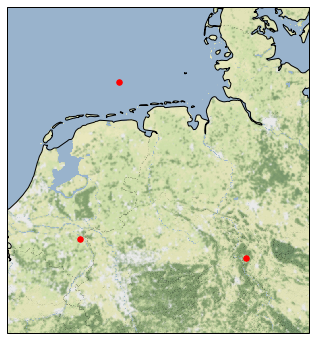

In [39]:
ds=ds_CE.isel(south_north=slice(2,412),time=0)
lats0 = ds.XLAT[:,:]
lons0 = ds.XLON[:,:]
lats = ds.XLAT[220:330,90:200]
lons = ds.XLON[220:330,90:200]


minlat = np.min(lats).values
maxlat = np.max(lats).values
minlon = np.min(lons).values
maxlon = np.max(lons).values

stamen_terrain = cimgt.Stamen('terrain-background')
plt.rcParams['pdf.fonttype'] = 42

fig = plt.figure(figsize=(12,6))

# Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1, 1, 1, projection=lcc)#stamen_terrain.crs)

# Limit the extent of the map to a small longitude/latitude range.
#ax.set_extent([minlon, maxlon, minlat, maxlat],
              #crs=ccrs.Geodetic())
buffer=[0.5,0.5,0.5,0.5]
ax.set_extent([minlon-buffer[0], maxlon+buffer[1], minlat-buffer[2], maxlat+buffer[3]],
              crs=ccrs.PlateCarree())

# Add the Stamen data at zoom level 8.
level = 8
#if (domain >= 1): level = 8
ax.add_image(stamen_terrain, level)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=1.)

ax.scatter(x=[lons0[320,120].values,lons0[230,185].values,lons0[240,100].values],y=[lats0[320,120].values,lats0[230,185].values,lats0[240,100].values],
           s=30,c="r", transform=ccrs.PlateCarree())
plt.savefig("domain_sites.eps",bbox='tight')
#ax.scatter(np.ravel(LR_WRF.XLON),np.ravel(LR_WRF.XLAT),s=1,c="b", transform=ccrs.PlateCarree())

In [41]:
x=[lons0[320,120].values,lons0[230,185].values,lons0[240,100].values]
y=[lats0[320,120].values,lats0[230,185].values,lats0[240,100].values]

In [42]:
y,x

([array(53.9734, dtype=float32),
  array(51.64523, dtype=float32),
  array(51.708412, dtype=float32)],
 [array(6.3374634, dtype=float32),
  array(9.667267, dtype=float32),
  array(5.8332825, dtype=float32)])

In [ ]:
pyproj.transform(wrf_proj, wgs_proj, xx, yy)

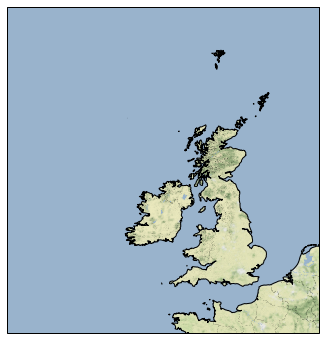

In [17]:
ds=ds_UK
lats = ds.XLAT[:,:]
lons = ds.XLON[:,:]


minlat = np.min(lats).values
maxlat = np.max(lats).values
minlon = np.min(lons).values
maxlon = np.max(lons).values

stamen_terrain = cimgt.Stamen('terrain-background')
plt.rcParams['pdf.fonttype'] = 42

fig = plt.figure(figsize=(12,6))

# Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1, 1, 1, projection=lcc_UK)#)stamen_terrain.crs)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([minlon+2, maxlon-1, minlat+1.5, maxlat-1.5],
              crs=ccrs.Geodetic())

# Add the Stamen data at zoom level 8.
level = 6
#if (domain >= 1): level = 8
ax.add_image(stamen_terrain, level)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=1.)

In [22]:
maxlat

array(64.18208313)

In [15]:
def WRF_domain_map(domain,diri, ERA5, LR_WRF,lcc=None,buffer=0.5,save_fig=0):
    plt.rcParams.update({'font.size': 18,
                         'axes.labelsize': 18,
                         'axes.titlesize': 18,
                         'legend.fontsize': 18,
                         'xtick.labelsize': 12,
                         'ytick.labelsize': 12
                         })


    dd = "%2.2d" % domain
    try:
        File = diri + "geo_em.d"+dd+".nc"
        print(File)
        ds = xr.open_dataset(File)
        lats = ds.XLAT_M[0,:,:]
        lons = ds.XLONG_M[0,:,:]
    except FileNotFoundError:
        File = diri + "static_d"+dd+".nc"
        print(File)
        ds = xr.open_dataset(File)
        lats = ds.XLAT[:,:]
        lons = ds.XLON[:,:]

    minlat = np.min(lats).values
    maxlat = np.max(lats).values
    minlon = np.min(lons).values
    maxlon = np.max(lons).values

    # if station != "none":
    #     df = pd.read_csv(station)

    #     df = df.where(df.lat > minlat).dropna()
    #     df = df.where(df.lat < maxlat).dropna()
    #     df = df.where(df.lon > minlon).dropna()
    #     df = df.where(df.lon < maxlon).dropna()
    #     print(df)

    stamen_terrain = cimgt.Stamen('terrain-background')
    plt.rcParams['pdf.fonttype'] = 42

    fig = plt.figure(figsize=(12,6))

    # Create a GeoAxes in the tile's projection.
    if lcc is not None:
        proj=lcc
    else:
        proj=stamen_terrain.crs
    ax = fig.add_subplot(1, 1, 1, projection=proj)#stamen_terrain.crs)

    # Limit the extent of the map to a small longitude/latitude range.
    ax.set_extent([minlon-buffer[0], maxlon+buffer[1], minlat-buffer[2], maxlat+buffer[3]],
                  crs=ccrs.PlateCarree())

    # Add the Stamen data at zoom level 8.
    level = 6
    if (domain >= 1): level = 8
    ax.add_image(stamen_terrain, level)
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=1.)
    #ax.add_feature(cfeature.STATES, linewidth=0.5)
    #ax.add_feature(cfeature.BORDERS.with_scale('10m'), linewidth=1.)

    #ax.plot(lons[0,:],lats[0,:],color="blue",transform=ccrs.Geodetic())
    #ax.plot(lons[:,0],lats[:,0],color="blue",transform=ccrs.Geodetic())
    #ax.plot(lons[-1,:],lats[-1,:],color="blue",transform=ccrs.Geodetic())
    #ax.plot(lons[:,-1],lats[:,-1],color="blue",transform=ccrs.Geodetic())

    for d in range(domain,16):
        data = False
        dd = "%2.2d" % d
        File = diri + "geo_em.d"+dd+".nc"
        if os.path.isfile(File):
            ds = xr.open_dataset(File)
            lats = ds.XLAT_M[0,:,:]
            lons = ds.XLONG_M[0,:,:]
            data = True
        File = diri + "static_d"+dd+".nc"
        if not data and os.path.isfile(File):
            ds = xr.open_dataset(File)
            lats = ds.XLAT[:,:]
            lons = ds.XLON[:,:]
            data = True
        if not data: break 

        print(ds.CEN_LAT,lats[60,60].values,ds.CEN_LON,lons[60,60].values)

        xbottom = lons[0,::2]
        ybottom = lats[0,::2]
        plt.plot(xbottom, ybottom,
                color='white', linewidth=2, 
                  transform=ccrs.PlateCarree(),
                  )

        xright = lons[::2,0]
        yright = lats[::2,0]
        plt.plot(xright, yright,
                color='white', linewidth=2, 
                transform=ccrs.PlateCarree(),
                )

        xtop = lons[-1,::2]
        ytop = lats[-1,::2]
        plt.plot(xtop, ytop,
                color='white', linewidth=2, 
                transform=ccrs.PlateCarree(),
                )

        xleft = lons[::2,-1]
        yleft = lats[::2,-1]
        plt.plot(xleft, yleft,
                color='white', linewidth=2, 
                transform=ccrs.PlateCarree(),
                )
        if ERA5 is not None:
            x=np.array([])
            y=np.array([])
            lons=ERA5.longitude.values
            lats=ERA5.latitude.values
            for i in range(ERA5.dims["longitude"]):
                for j in range(ERA5.dims["latitude"]):
                    x=np.append(x,lons[i])
                    y=np.append(y,lats[j])

            ax.scatter(x,y,s=1,c="r", transform=ccrs.PlateCarree())
        if LR_WRF is not None:
            ax.scatter(np.ravel(LR_WRF.XLON),np.ravel(LR_WRF.XLAT),s=1,c="b", transform=ccrs.PlateCarree())
        


    # if station != "none":
    #     side = ["left","right"]
    #     trans = [20.,-20.]
    #     for k,name in enumerate(df.name):
    #         try:
    #             ax.plot(df.lon.iloc[k], df.lat.iloc[k], marker='o', color='red', markersize=8,
    #                     alpha=0.7, transform=ccrs.Geodetic())
    #     # Use the cartopy interface to create a matplotlib transform object
    #     # for the Geodetic coordinate system. We will use this along with
    #     # matplotlib's offset_copy function to define a coordinate system which
    #     # translates the text by 10 pixels to the left.
    #             i = k % 2

    #             geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
    #             text_transform = offset_copy(geodetic_transform, units='dots',
    #                                         x=trans[i])

    #        # Add text 25 pixels to the left of the volcano.
    #             ax.text(df.lon.iloc[k],df.lat.iloc[k],name,
    #                verticalalignment='center', horizontalalignment=side[i],
    #                 transform=text_transform,
    #                 bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))
    #         except AttributeError:
    #             print("coordinates not in map")
    if save_fig:
        if lcc is not None:
            plt.savefig("domain_map-d0"+str(domain)+"_lcc.eps",bbox='tight')#,quality=100,ppi=500)
        else:
            plt.savefig("domain_map-d0"+str(domain)+".eps",bbox='tight')


//smb.uni-oldenburg.de/hpc_data/NEWA_nc/geogrid\CE/geo_em.d03.nc
51.03733 46.53709 13.473663 5.063629


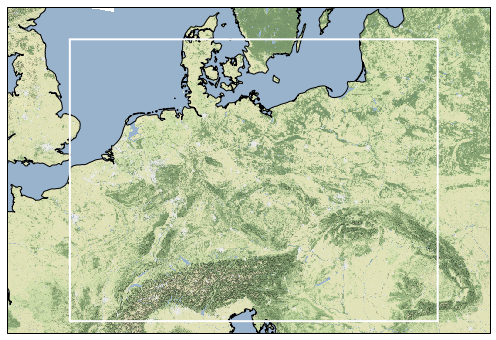

In [16]:
WRF_domain_map(3,geogrid_diri[0]+"/",None,None,lcc,[0.5,0.5,0.5,0.5],1)

In [12]:
ds=ds_UK
globe = ccrs.Globe(ellipse='sphere', semimajor_axis=6370000, semiminor_axis=6370000)
lcc_UK = ccrs.LambertConformal(globe=globe, # important!
                            central_longitude=ds.STAND_LON, central_latitude=ds.MOAD_CEN_LAT,
                            standard_parallels=(ds.TRUELAT1, ds.TRUELAT2),
                            )

//smb.uni-oldenburg.de/hpc_data/NEWA_nc/geogrid\GB/geo_em.d03.nc
55.921814 49.272488 -6.355957 -9.666107


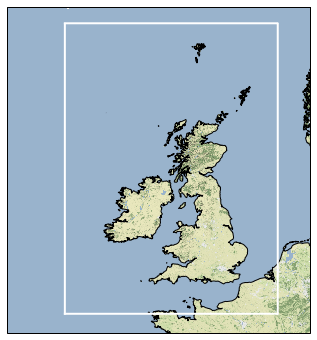

In [24]:
WRF_domain_map(3,geogrid_diri[1]+"/",None,None,lcc_UK,[-4,0,-1.5,-1.5],1)

//smb.uni-oldenburg.de/hpc_data/NEWA_nc/geogrid\CE/geo_em.d03.nc
51.03733 46.53709 13.473663 5.063629


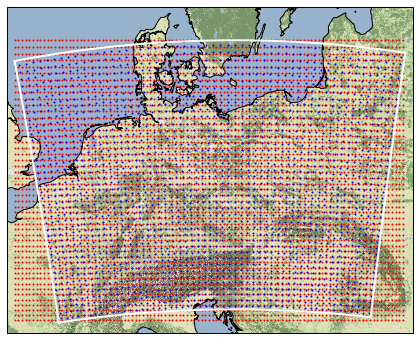

In [56]:
WRF_domain_map(3,geogrid_diri[0]+"/",SlicedData,LR_WRF,LCC)

//smb.uni-oldenburg.de/hpc_data/NEWA_nc/geogrid\GB/geo_em.d03.nc
55.921814 49.272488 -6.355957 -9.666107


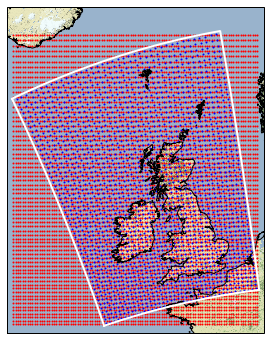

In [89]:
WRF_domain_map(3,geogrid_diri[1]+"/",SlicedData_UK,LR_WRF_UK)